<a href="https://colab.research.google.com/github/aldomasson/DMC_ML_Aldo/blob/main/Supervised_models/Logistic_regression/Titanic_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align=center><font size = 5>Titanic - Machine Learning from Disaster</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Titanic Problem</a>  
4. <a href="#item34">Análisis y tratamiento de variables</a>  
5. <a href="#item34">Regresión Logística</a>  
6. <a href="#item34">Elastic Net</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión logística.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión logística.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Descargar y limpiar Dataset


Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [2]:

# Scikit-Learn
import sklearn

# Imports comunes
import pandas as pd
import numpy as np


# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})


## Esta es la legendaria competencia Titanic ML



El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió tras chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y la tripulación.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

<img src="https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué tipo de personas tenían más probabilidades de sobrevivir? </div>


<b>Descripción de datos</b>

El data frame de Titanic tiene 891 filas y 12 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>Survival : </b>  Supervivencia (0 = No, 1 = Sí)
* <b>Pclass : </b>  Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* <b>Sex : </b>  Sexo
* <b>Age : </b>  Edad en años
* <b>Sibsp : </b>  # de hermanos / cónyuges a bordo del Titanic
* <b>Parch : </b>  # de padres / hijos a bordo del Titanic

* <b>Ticket : </b>  Número de ticket

* <b>Fare : </b>  Tarifa de pasajero
* <b>Cabin : </b>  Número de cabina
* <b>Embarked : </b>  Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton)



---


<strong>Puede consultar este [link](https://www.kaggle.com/c/titanic/overview) para leer más sobre la fuente de datos Titanic.</strong>


## 1. Descargar y explorar Dataset


In [3]:
# Cargar Data
data = pd.read_csv("train_titanic.csv")
target = 'Survived'
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

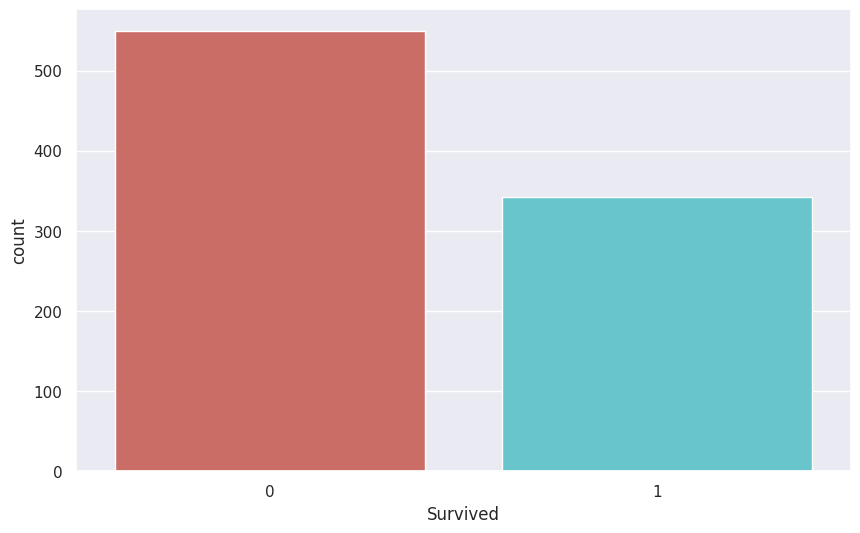

In [4]:
# Analizando el target
sns.countplot(x='Survived', data = data, palette = 'hls')

In [5]:
data.Survived.mean()

0.3838383838383838

In [6]:
data.groupby(['Pclass']).agg({"PassengerId":"count",
                              "Fare" :"mean",
                              "Age" : "mean",
                              "Age" : "median",
                              "Survived" : "mean"}).reset_index()

,Pclass,PassengerId,Fare,Age,Survived
0,1,216,84.154687,37.0,0.629630
1,2,184,20.662183,29.0,0.472826
2,3,491,13.675550,24.0,0.242363


## 2. Análisis exploratorio (EDA)

Analizando variables categóricas


<Axes: xlabel='Sex', ylabel='count'>

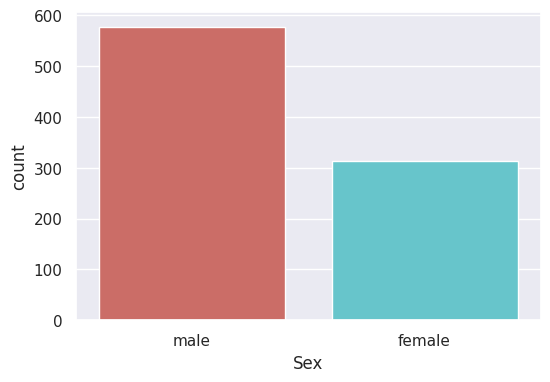

In [7]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(x='Sex', data = data, palette = 'hls')

In [8]:
res = data.groupby(['Sex']).agg({"PassengerId":"count",
                           "Survived" :"mean"}).reset_index()
res

,Sex,PassengerId,Survived
0,female,314,0.742038
1,male,577,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

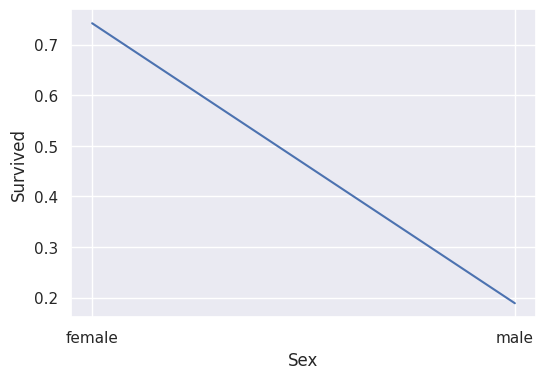

In [9]:
sns.lineplot(x = 'Sex', y = 'Survived', data = res)

<Axes: xlabel='Pclass', ylabel='Survived'>

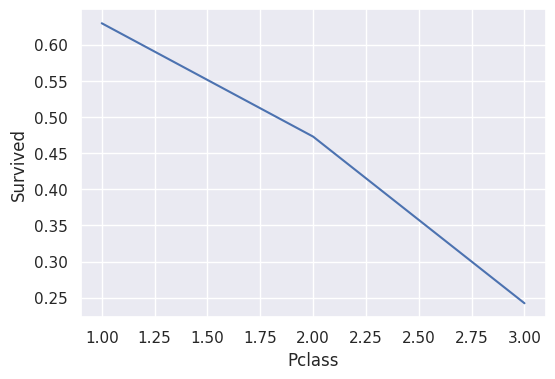

In [10]:
sns.lineplot(x = 'Pclass', y = 'Survived', data = data.groupby(['Pclass']).agg({"PassengerId":"count", "Survived" :"mean"}).reset_index())

Analizando variables numéricas




<Axes: xlabel='edad_cat', ylabel='Survived'>

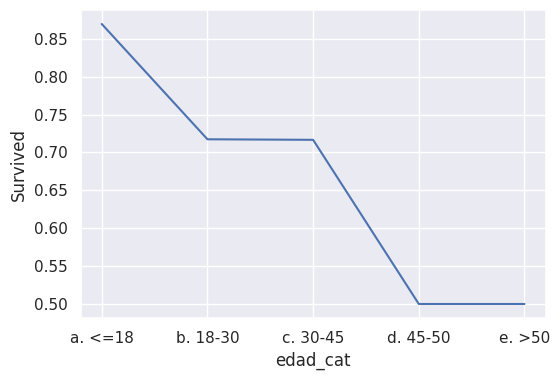

In [11]:
from math import isnan

def catedad(x):
  if isnan(x):
    return 'missing'
  elif x <= 18:
    return 'a. <=18'
  elif x <= 30:
    return 'b. 18-30'
  elif x <= 45:
    return 'c. 30-45'
  elif x <= 50:
    return 'd. 45-50'
  else:
    return 'e. >50'

temp = data.copy()
temp = temp.dropna()
temp['edad_cat'] = data.Age.apply(lambda x: catedad(x))

sns.lineplot(x = 'edad_cat', y = 'Survived', data = temp.groupby(['edad_cat']).agg({"PassengerId":"count", "Survived" :"mean"}).reset_index())


In [12]:
temp.groupby(['edad_cat']).agg({"PassengerId":"count", "Survived" :"mean"}).reset_index()

,edad_cat,PassengerId,Survived
0,a. <=18,23,0.869565
1,b. 18-30,46,0.717391
2,c. 30-45,60,0.716667
3,d. 45-50,22,0.500000
4,e. >50,32,0.500000


In [13]:
# Discretizar variable con kBinsDiscretizer

from sklearn.preprocessing import KBinsDiscretizer

data['Age_cat'] = KBinsDiscretizer(n_bins = 6,
                                   encode = 'ordinal',
                                   strategy = "quantile").fit_transform(data[['Age']].fillna(data[['Age']].mean()))


<ipython-input-14-1cccc94fdf6d>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data['Age_cat'], palette = 'hls', discrete=True)


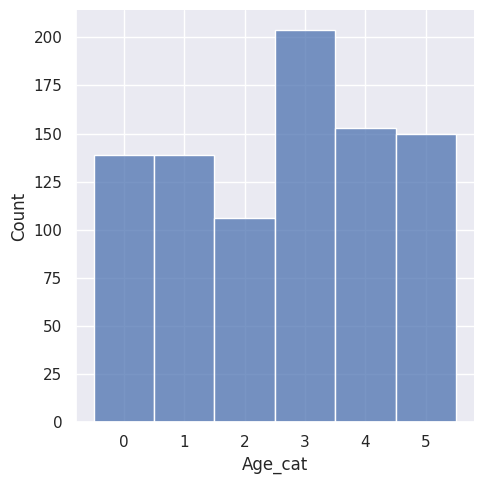

In [14]:
sns.displot(data['Age_cat'], palette = 'hls', discrete=True)

In [15]:
aggregations = {'Survived':'mean', 'PassengerId':'count'}
res = data.groupby('Age_cat').agg(aggregations).reset_index()

<Axes: xlabel='Age_cat', ylabel='Survived'>

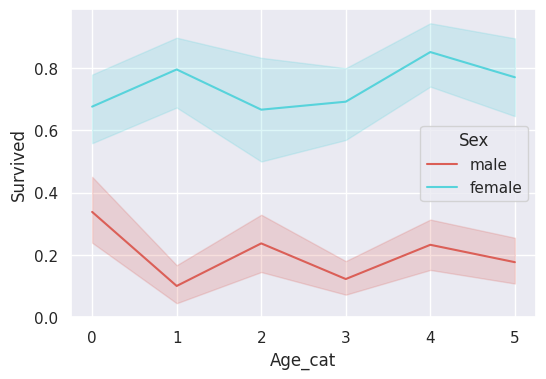

In [16]:
# Ratio del evento por tramo dela variable numérica
sns.lineplot(data=data, x="Age_cat", y="Survived", palette = 'hls', hue = 'Sex')

<Axes: xlabel='Age_cat', ylabel='Survived'>

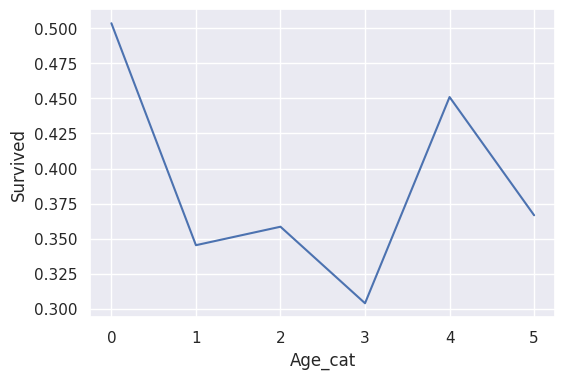

In [17]:
sns.lineplot(x = 'Age_cat', y = 'Survived', data = data.groupby(['Age_cat']).agg({"Survived" :"mean"}).reset_index())

In [18]:
# Discretizar variable FARE con kBinsDiscretizer

from sklearn.preprocessing import KBinsDiscretizer

data['Fare_category'] = KBinsDiscretizer(n_bins = 6,
                                   encode = 'ordinal',
                                   strategy = "quantile").fit_transform(data[['Fare']].fillna(data[['Fare']].mean()))

<ipython-input-19-b8226df9fbb4>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data['Fare_category'], palette = 'hls', discrete=True)


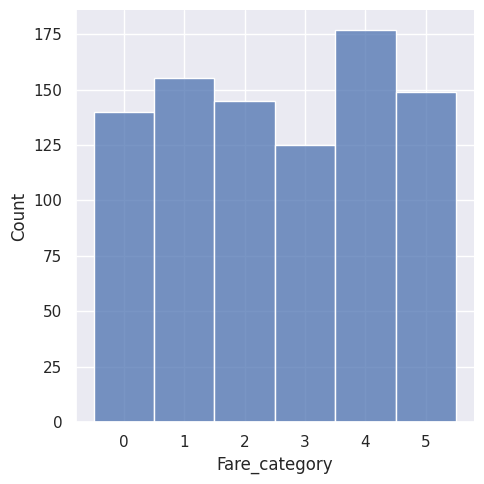

In [19]:
sns.displot(data['Fare_category'], palette = 'hls', discrete=True)

In [20]:
aggregations = {'Survived':'mean', 'PassengerId':'count'}
res = data.groupby('Fare_category').agg(aggregations).reset_index()

<Axes: xlabel='Fare_category', ylabel='Survived'>

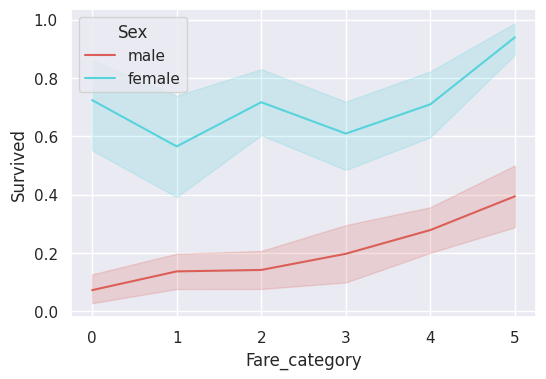

In [21]:
# Ratio del evento por tramo dela variable numérica
sns.lineplot(data=data, x="Fare_category", y="Survived", palette = 'hls', hue = 'Sex')

<Axes: xlabel='Fare_category', ylabel='Survived'>

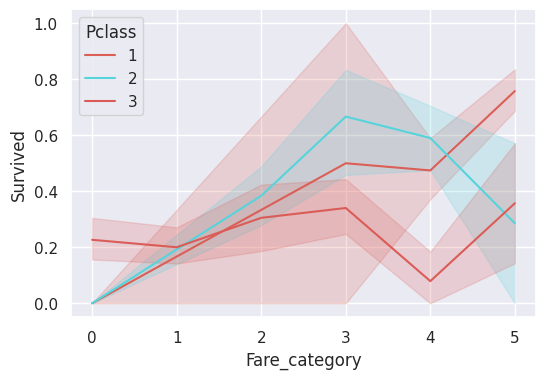

In [26]:
# Ratio del evento por tramo dela variable numérica
sns.lineplot(data=data, x="Fare_category", y="Survived", palette = 'hls', hue = 'Pclass')

<Axes: xlabel='Fare_category', ylabel='Survived'>

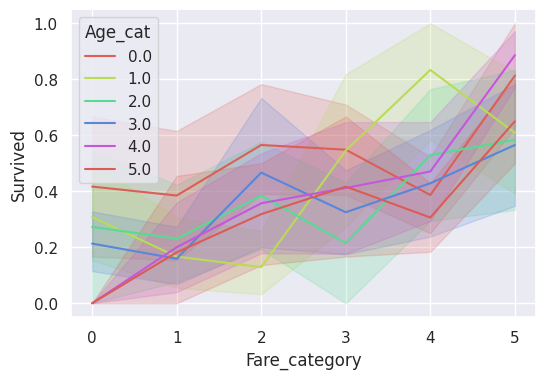

In [29]:
# Ratio del evento por tramo dela variable numérica
sns.lineplot(data=data, x="Fare_category", y="Survived", palette = 'hls', hue = 'Age_cat')

<Axes: xlabel='Fare_category', ylabel='Survived'>

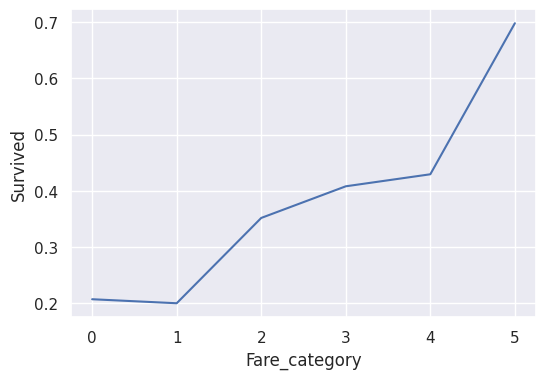

In [30]:
sns.lineplot(x = 'Fare_category', y = 'Survived', data = data.groupby(['Fare_category']).agg({"Survived" :"mean"}).reset_index())

Como Insigth observamos que tanto para la EDAD, SEXO o CLASE a mas Costo del Ticket (Fare o Fare Category) la probabilidad de supervivencia es mayor

## 3. Muestreo Train/Test

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               test_size = 0.3,
                               random_state = 123)


## 4.  Tratamiento de variables categoricas

In [ ]:
#Variables

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']


In [ ]:
data[catFeatures].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


### Encoding de variables categóricas


---

<h3>Label Encoding</h3>

El label encoding consiste en asignar un número (por lo general entero) a cada una de las categorías de la variable categórica.

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">



---

<h3>One Hot Encoding</h3>

El One hot encoding es un proceso que consiste en dummizar cada catgoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---

<div style="text-align: center">Ejemplo de one hot Encoding </div>

<h3>Target Encoding</h3>

El target encoding es una técnica que consiste en inputar el promedio del target a cada uno de los valores de la variable categórica.

<img src="https://lh6.googleusercontent.com/6_KrGj2k9NvcLVfmZ6HIYruAqav4rX86YU7WOhXofDGd6-98JjUPWajo0dDqmFMXv3tN0b_LOmgYLiPMCFyIWw3b7lVrCAiSboWgJ_AJ4TqHpNWUHkgIxl0xuSF9JdSXNbWG48QS" alt="HTML5 Icon" style="width: 600px; height: 450px;">

---


In [ ]:
# Tratamiento de variables categóricas

In [ ]:
data[catFeatures].fillna('missing', inplace = True)

<ipython-input-19-3640a1dbb0ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[catFeatures].fillna('missing', inplace = True)


In [ ]:
data[catFeatures].drop_duplicates().head(20)

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
5,3,male,Q
6,1,male,S
9,2,female,C
15,2,female,S
17,2,male,S
19,3,female,C


In [ ]:
# Reemplazar las filas NaN por una categoría específica para missings
for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

data[catFeatures].drop_duplicates()


,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
5,3,male,Q
6,1,male,S
9,2,female,C
15,2,female,S
17,2,male,S
19,3,female,C


<h3>One Hot Encoding</h3>

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder(sparse_output = True)


In [ ]:
OneHotEncoder.fit(train[catFeatures])

train[OneHotEncoder.get_feature_names_out(catFeatures)] = OneHotEncoder.transform(train[catFeatures]).toarray()
test[OneHotEncoder.get_feature_names_out(catFeatures)] = OneHotEncoder.transform(test[catFeatures]).toarray()


<h3>Target Encoding</h3>

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

In [ ]:
encoder.fit(train[catFeatures].astype('category'), train[target])

train[[x + '_coded' for x in catFeatures]] = encoder.transform(train[catFeatures].astype('category'))
test[[x + '_coded' for x in catFeatures]] = encoder.transform(test[catFeatures].astype('category'))


In [ ]:
test[['Sex','Sex_coded']].drop_duplicates()


,Sex,Sex_coded
172,female,0.743243
524,male,0.197007


In [ ]:
test[['Pclass','Pclass_coded']].drop_duplicates()


,Pclass,Pclass_coded
172,3,0.259366
452,1,0.639455
397,2,0.465115


## 5. Análisis univariado

In [ ]:

# Creando métricas de las variables

univariate = train[numFeatures].describe(percentiles = [0.01, 0.25, 0.5, 0.75, 0.99]).transpose()
univariate.reset_index(inplace = True)
univariate.rename(columns = {'index':'feature',
                             '1%': 'P1',
                             '25%': 'Q1',
                             '50%': 'median',
                             '75%': 'Q3',
                             '99%': 'P99'}, inplace = True)

univariate[['missing_rate']] = 1 - univariate[['count']]/train.shape[0]
univariate.sort_values(by = 'missing_rate', ascending = False, inplace = True)


## 6. Tratamiento de variables numéricas




In [ ]:
# Tratamiento de outliers por percentiles

univariate['li_per'] = univariate['P1']
univariate['ls_per'] = univariate['P99']


In [ ]:
# Tratamiento de outliers por Z-score

def ric(dataframe, univariate, featuresToTreat):
  for col in featuresToTreat:
    desc = univariate.loc[univariate.feature == col]
    dataframe[col + '_per'] = dataframe[col].apply(lambda x: desc.ls_per.values[0] if x > desc.ls_per.values[0]
                                                            else desc.li_per.values[0] if x < desc.li_per.values[0]
                                                            else x)
  return dataframe


In [ ]:
train_I = ric(train, univariate, univariate.feature.tolist())
test_I  = ric(test,  univariate, univariate.feature.tolist())

## 7. Tratamiento de missings

In [ ]:
# Trataiento de missings

featsTofill = [x + '_per' for x in numFeatures]

train_I[featsTofill] = train_I[featsTofill].fillna(train_I[featsTofill].median())
test_I[featsTofill]  = test_I[featsTofill].fillna(train_I[featsTofill].median())


In [ ]:
variables = ['Age_per','Fare_per','SibSp_per','Parch_per', 'Pclass_coded', 'Sex_coded', 'Embarked_coded']



,Age_per,Fare_per,SibSp_per,Parch_per,Pclass_coded,Sex_coded,Embarked_coded
416,0.357500,0.008193,0.447507,0.918294,0.460994,1.342910,-0.550933
801,0.120687,-0.128252,0.447507,0.918294,0.460994,1.342910,-0.550933
512,0.515376,-0.127433,-0.464727,-0.494291,1.555023,-0.743456,-0.550933
455,-0.037188,-0.528947,-0.464727,-0.494291,-0.830134,-0.743456,2.084435
757,-0.905502,-0.450263,-0.464727,-0.494291,0.460994,-0.743456,-0.550933
...,...,...,...,...,...,...,...
98,0.357500,-0.199204,-0.464727,0.918294,0.460994,1.342910,-0.550933
322,0.041750,-0.431706,-0.464727,-0.494291,0.460994,1.342910,0.373829
382,0.199625,-0.528310,-0.464727,-0.494291,-0.830134,-0.743456,-0.550933
365,0.041750,-0.543046,-0.464727,-0.494291,-0.830134,-0.743456,-0.550933


## 8. Estandarización

In [ ]:

#Estandarización de datos
variables = ['Age_per','Fare_per','SibSp_per','Parch_per', 'Pclass_coded', 'Sex_coded', 'Embarked_coded']

train_II = (train_I[variables] - train_I[variables].mean())/train_I[variables].std()
test_II  = (test_I[variables] - train_I[variables].mean())/train_I[variables].std()


## 9. Logistic Regression

In [ ]:
#Variables para el modelo

numFeatures = ['Age_per','Fare_per','SibSp_per','Parch_per']
catFeatures = ['Pclass_coded', 'Sex_coded', 'Embarked_coded']

X_train = train_II[numFeatures + catFeatures]
X_test  = test_II[numFeatures + catFeatures]

y_train = train.Survived
y_test  = test.Survived



In [ ]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(y_train, sm.add_constant(X_train))
res = mod.fit()

print(res.summary())


Optimization terminated successfully.
         Current function value: 0.447594
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.3314
Time:                        02:33:05   Log-Likelihood:                -278.85
converged:                       True   LL-Null:                       -417.09
Covariance Type:            nonrobust   LLR p-value:                 6.350e-56
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6045      0.108     -5.586      0.000      -0.817      -0.392
Age_per          

In [ ]:
import statsmodels.api as sm
# Método Backward

mod_features = list(set(numFeatures + catFeatures) - set(['Fare_per', 'Parch_per', 'Embarked_coded']))

# Fit and summarize OLS model
mod = sm.Logit(y_train, sm.add_constant(X_train[mod_features]))
res = mod.fit()

print(res.summary())


Optimization terminated successfully.
         Current function value: 0.449873
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      618
Method:                           MLE   Df Model:                            4
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.3280
Time:                        02:33:46   Log-Likelihood:                -280.27
converged:                       True   LL-Null:                       -417.09
Covariance Type:            nonrobust   LLR p-value:                 5.257e-58
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6049      0.107     -5.635      0.000      -0.815      -0.395
Pclass_coded     0.9909

In [ ]:
# Analizando los parámetros del modelo

modelo = pd.DataFrame({'coeficiente' : res.params})
modelo.reset_index(inplace = True)
modelo.rename(columns = {'index': 'feature'}, inplace = True)
modelo = modelo.loc[modelo.feature != 'const']
modelo['peso'] = abs(modelo.coeficiente)/abs(modelo.coeficiente).sum()
modelo.sort_values(by = 'peso', ascending = False, inplace = True)
modelo


,feature,coeficiente,peso
4,Sex_coded,1.292450,0.393517
1,Pclass_coded,0.990921,0.301709
3,Age_per,-0.581098,0.176929
2,SibSp_per,-0.419887,0.127844


## 10. Correlaciones

In [ ]:
X_train[mod_features].corr()

,Pclass_coded,SibSp_per,Age_per,Sex_coded
Pclass_coded,1.000000,-0.062456,0.354816,0.127735
SibSp_per,-0.062456,1.000000,-0.192284,0.122165
Age_per,0.354816,-0.192284,1.000000,-0.084885
Sex_coded,0.127735,0.122165,-0.084885,1.000000


# 11. Performance

In [ ]:
# Usando el modelo para predecir

train_II['probability'] = res.predict(sm.add_constant(train_II[mod_features]))
test_II['probability']  = res.predict(sm.add_constant(test_II[mod_features]))

train_II['prediction'] = train_II['probability'].apply(lambda x: 1 if x >= 0.5 else 0)
test_II['prediction']  = test_II['probability'].apply(lambda x: 1 if x >= 0.5 else 0)

test_II['Survived'] = y_test


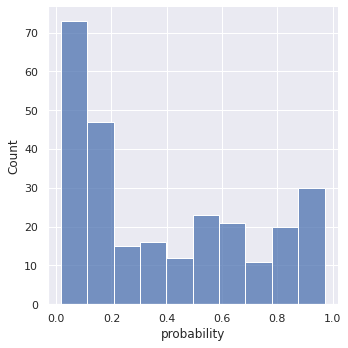

In [ ]:
sns.displot(test_II, x="probability", fill=True)

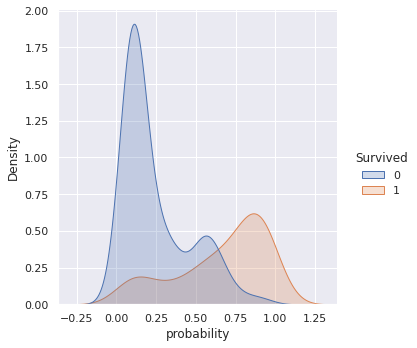

In [ ]:
sns.displot(test_II, x="probability", hue = 'Survived', kind="kde", fill=True)

Gini del modelo

In [ ]:
from sklearn.metrics import *

In [ ]:
def plot_roc_curve(y_true, y_score, filepath=None, line_width=2, width=12,
                   height=10, title=None, colors=("#FF0000", "#000000")):
    """
    Saves a ROC curve in a file or shows it on screen.
    :param y_true: actual values of the response (list|np.array)
    :param y_score: predicted scores (list|np.array)
    :param filepath: if given, the ROC curve is saved in the desired filepath. It should point to a png file in an
    existing directory. If not specified, the curve is only shown (str)
    :param line_width: number indicating line width (float)
    :param width: number indicating the width of saved plot (float)
    :param height: number indicating the height of saved plot (float)
    :param title: if given, title to add to the top side of the plot (str)
    :param colors: color specification for ROC curve and diagonal respectively (tuple of str)
    :return: None
    """
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    gini = auc(fpr, tpr) * 2 - 1

    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(width, height))
    major_ticks = np.arange(0, 1.1, 0.1)
    minor_ticks = np.arange(0.05, 1, 0.1)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="both", axis="both")
    ax.grid(which="minor", alpha=0.2)
    ax.grid(which="major", alpha=0.5)
    ax.tick_params(which="major", direction="out", length=5)
    plt.plot(fpr, tpr, color=colors[0], lw=line_width,
                   label="ROC curve (gini = {:.2f})".format(gini))
    plt.plot([0, 1], [0, 1], color=colors[1], lw=line_width, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel("False positive rate", fontsize=15)
    plt.ylabel("True positive rate", fontsize=15)
    if title:
        plt.title(title, fontsize=30, loc="left")
    plt.legend(loc="lower right", frameon=True, fontsize="large",
                     fancybox=True)
    plt.tight_layout()
    if filepath:
        plt.savefig(filepath, dpi=200)
        plt.close()
    else:
        plt.show()

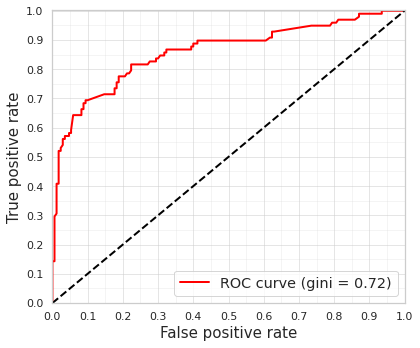

In [ ]:
plot_roc_curve(y_test, test_II.probability, width=6, height=5)

In [ ]:
# AUC

print('TRAIN AUC: %f' %(roc_auc_score(y_train, train_II.probability)))
print('TEST AUC: %f' %(roc_auc_score(y_test, test_II.probability)))


TRAIN AUC: 0.851724
TEST AUC: 0.859214


In [ ]:
# GINI

print('TRAIN GINI: %f' %(roc_auc_score(y_train, train_II.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(y_test, test_II.probability)*2-1))


TRAIN GINI: 0.703447
TEST GINI: 0.718427


In [ ]:
# Tablas cruzadas

pd.crosstab(test_II.prediction, y_test, margins=True, margins_name="Total")

Survived,0,1,Total
prediction,,,
0,139,25,164
1,31,73,104
Total,170,98,268


In [ ]:
pd.crosstab(test_II.prediction, y_test, margins=True, margins_name="Total", normalize=True)

Survived,0,1,Total
prediction,,,
0,0.518657,0.093284,0.61194
1,0.115672,0.272388,0.38806
Total,0.634328,0.365672,1.00000


In [ ]:
# ACCURACY

print('TRAIN ACCURACY: %f' %(accuracy_score(y_train, train_II.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(y_test, test_II.prediction)))


TRAIN ACCURACY: 0.791332
TEST ACCURACY: 0.791045


In [ ]:
# PRECISION

print('TRAIN PRECISION: %f' %(precision_score(y_train, train_II.prediction)))
print('TEST PRECISION: %f' %(precision_score(y_test, test_II.prediction)))


TRAIN PRECISION: 0.745690
TEST PRECISION: 0.701923


In [ ]:
# RECALL

print('TRAIN RECALL: %f' %(recall_score(y_train, train_II.prediction)))
print('TEST RECALL: %f' %(recall_score(y_test, test_II.prediction)))


TRAIN RECALL: 0.709016
TEST RECALL: 0.744898


In [ ]:
# F1

print('TRAIN F1: %f' %(f1_score(y_train, train_II.prediction)))
print('TEST F1: %f' %(f1_score(y_test, test_II.prediction)))


TRAIN F1: 0.726891
TEST F1: 0.722772


In [ ]:
#Resumen de todas las métricas del modelo

metricsLogisitc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'logistic_train':[roc_auc_score(y_train, train_II.probability),
                                        (roc_auc_score(y_train, train_II.probability)*2-1),
                                        accuracy_score(y_train, train_II.prediction),
                                        precision_score(y_train, train_II.prediction),
                                        recall_score(y_train, train_II.prediction),
                                        f1_score(y_train, train_II.prediction)],

                                'logistic_test':[roc_auc_score(y_test, test_II.probability),
                                        (roc_auc_score(y_test, test_II.probability)*2-1),
                                        accuracy_score(y_test, test_II.prediction),
                                        precision_score(y_test, test_II.prediction),
                                        recall_score(y_test, test_II.prediction),
                                        f1_score(y_test, test_II.prediction)]})

metricsLogisitc

,metric,logistic_train,logistic_test
0,AUC,0.851724,0.859214
1,Gini,0.703447,0.718427
2,Accuracy,0.791332,0.791045
3,Precision,0.745690,0.701923
4,Recall,0.709016,0.744898
5,F1-score,0.726891,0.722772


<h3>Análisis de Predicción</h3>

In [ ]:

from sklearn.preprocessing import KBinsDiscretizer

test_II['probability_rank'] = KBinsDiscretizer(n_bins = 6,
                                              encode = 'ordinal',
                                              strategy = "uniform").fit_transform(test_II[['probability']])


In [ ]:
aggregations = {'prediction':'count','probability':'max','Survived':'mean'}
res = test_II.groupby('probability_rank').agg(aggregations).reset_index()

In [ ]:

pddf1 = pd.DataFrame({'probability_rank':test_II.probability_rank,
                      'value':test_II.probability,
                     'type': 'probability_mean'})

pddf2 = pd.DataFrame({'probability_rank':test_II.probability_rank,
                      'value':test_II.Survived,
                     'type': 'Survived_rate'})

pddf = pddf1.append(pddf2)


<ipython-input-78-a7d24d67000d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pddf = pddf1.append(pddf2)


<Axes: xlabel='probability_rank', ylabel='value'>

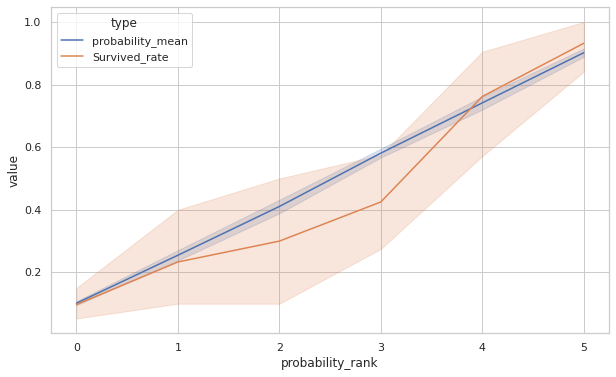

In [ ]:
# Ratio del evento por tramo dela variable numérica

sns.lineplot(data=pddf.reset_index(), x="probability_rank", y="value", hue="type", markers=True, dashes=False)


## Elastic Net

In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num','Sex_num','Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived


In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
# Modelo
from sklearn.linear_model import LogisticRegression

eltNet = LogisticRegression(penalty = 'elasticnet',
                            class_weight = {0:y_train.mean(), 1:1},
                            solver = 'saga',
                            C = 10000000,
                            l1_ratio = 0.5,
                            max_iter = 10000,
                            random_state = 123)

eltNet.fit(X_train, y_train)


LogisticRegression(C=10000000, class_weight={0: 0.391653290529695, 1: 1},
                   l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   random_state=123, solver='saga')

In [ ]:
# Analizando los parámetros del modelo

paramElasticNet = pd.DataFrame({'feature': numFeatures + catFeatures,
                                'parámetro': eltNet.coef_.ravel(),
                                'metod': 'elastic_net'})
paramElasticNet

,feature,parámetro,metod
0,Age_t,-0.026383,elastic_net
1,Fare_t,0.016320,elastic_net
2,SibSp_t,-0.347499,elastic_net
3,Parch_t,0.108889,elastic_net
4,Pclass_num,0.334190,elastic_net
5,Sex_num,1.202953,elastic_net
6,Embarked_num,0.148644,elastic_net


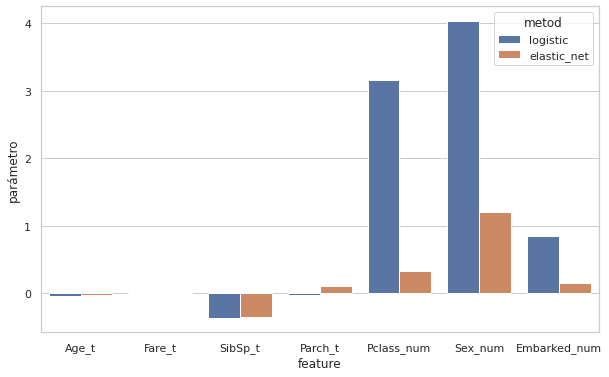

In [ ]:
resumen = paramLogistic.append(paramElasticNet)

sns.barplot(x='feature', y='parámetro', hue='metod', data=resumen)


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = eltNet.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = eltNet.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = eltNet.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = eltNet.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test


In [ ]:
#Resumen de todas las métricas del modelo

metricsElasticNet = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'ElasticNet_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'ElasticNet_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsElasticNet

,metric,ElasticNet_train,ElasticNet_test
0,AUC,0.822554,0.823049
1,Gini,0.645108,0.646098
2,Accuracy,0.661316,0.652985
3,Precision,0.541353,0.515337
4,Recall,0.885246,0.857143
5,F1-score,0.671851,0.643678


In [ ]:
pdRes = pd.merge(metricsLogisitc, metricsElasticNet, on = 'metric', how='left')
pdRes

,metric,logistic_train,logistic_test,ElasticNet_train,ElasticNet_test
0,AUC,0.853816,0.862185,0.822554,0.823049
1,Gini,0.707632,0.724370,0.645108,0.646098
2,Accuracy,0.791332,0.805970,0.661316,0.652985
3,Precision,0.761468,0.755556,0.541353,0.515337
4,Recall,0.680328,0.693878,0.885246,0.857143
5,F1-score,0.718615,0.723404,0.671851,0.643678


## Naive Bayes

In [ ]:
# Cargar Data
import pandas as pd
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Variables

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']

In [ ]:
data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())

In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']

X = data[numFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
X_train.corr()

,Age_t,Fare_t,SibSp_t,Parch_t
Age_t,1.000000,0.104797,-0.184710,-0.163742
Fare_t,0.104797,1.000000,0.167693,0.236887
SibSp_t,-0.184710,0.167693,1.000000,0.434061
Parch_t,-0.163742,0.236887,0.434061,1.000000


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)


In [ ]:
gnb.predict_proba(X_train[numFeatures])

array([[0.68313158, 0.31686842],
       [0.69047955, 0.30952045],
       [0.72529459, 0.27470541],
       ...,
       [0.7237841 , 0.2762159 ],
       [0.71873977, 0.28126023],
       [0.7167673 , 0.2832327 ]])

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = gnb.predict_proba(X_train[numFeatures])[:,1]
X_test['probability']  = gnb.predict_proba(X_test[numFeatures])[:,1]

X_train['prediction'] = gnb.predict(X_train[numFeatures])
X_test['prediction']  = gnb.predict(X_test[numFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
#Resumen de todas las métricas del modelo

metricsgnb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'gnb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'gnb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsgnb

,metric,gnb_train,gnb_test
0,AUC,0.674521,0.693097
1,Gini,0.349042,0.386194
2,Accuracy,0.685393,0.716418
3,Precision,0.744898,0.805556
4,Recall,0.299180,0.295918
5,F1-score,0.426901,0.432836


In [ ]:
pdRes = pd.merge(pdRes, metricsgnb, on = 'metric', how='left')
pdRes

,metric,logistic_train,logistic_test,ElasticNet_train,ElasticNet_test,gnb_train,gnb_test
0,AUC,0.853816,0.862185,0.761425,0.782833,0.674521,0.693097
1,Gini,0.707632,0.724370,0.522849,0.565666,0.349042,0.386194
2,Accuracy,0.791332,0.805970,0.566613,0.537313,0.685393,0.716418
3,Precision,0.761468,0.755556,0.472917,0.436893,0.744898,0.805556
4,Recall,0.680328,0.693878,0.930328,0.918367,0.299180,0.295918
5,F1-score,0.718615,0.723404,0.627072,0.592105,0.426901,0.432836


## Decision Tree

In [ ]:
data = pd.read_csv("train_titanic.csv")

In [ ]:
data[c] = data[c].replace(np.nan,'missing')


In [ ]:

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']

for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

In [ ]:
data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())


In [ ]:
# Target Encoding
from category_encoders import TargetEncoder
encoder = TargetEncoder()

data[[x + '_num' for x in catFeatures]] = encoder.fit_transform(data[catFeatures], data['Survived'])


/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num','Sex_num','Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
# Configuramos el modelo

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)



In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = numFeatures + catFeatures,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


In [ ]:
# Configuramos el modelo

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 3,
                               min_samples_leaf = 0.03,
                               min_samples_split = 0.1,
                               #class_weight = {andom_state = 1230:y_train.mean(),1:1},
                               r)
dtree = dtree.fit(X_train, y_train)

dtree

DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.03,
                       min_samples_split=0.1, random_state=123)

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = numFeatures + catFeatures,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = dtree.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = dtree.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
#Resumen de todas las métricas del modelo

metricsDtree = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree

In [ ]:
pd.merge(metricsLogisitc, metricsDtree, on = 'metric', how='left')

### Gracias por completar este laboratorio!

---

